# 第二章 加利福尼亚房产数据处理

## 1.获取数据

### 开放数据库

- 流行的开放数据库:
    1. [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
    2. [Kaggle datasets](https://www.kaggle.com/datasets)
    3. [Amazon’s AWS datasets](http://aws.amazon.com/fr/datasets/)
- 元门户站点(它们会列出开放的数据存储库):
    1. http://dataportals.org/
    2. http://opendatamonitor.eu/
    3. http://quandl.com/
- 其他一些列出许多流行的开放数据存储库的页面:
    1. [Wikipedia’s list of Machine Learning datasets](https://goo.gl/SJHN2k)
    2. [Quora.com question](http://goo.gl/zDR78y)
    3. [Datasets subreddit](https://www.reddit.com/r/datasets)

## 1.1 下载数据

In [1]:
import os
import tarfile # 解压缩模块
import urllib  # 提供了一系列用于操作URL的功能

# 数据下载网址
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    
    # 在当前目录下创建新目录
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
HOUSING_URL

'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [3]:
fetch_housing_data()
print("下载完成")

下载完成


## 1.2 使用Pandas加载数据

In [4]:
import pandas as pd

# 返回一个包含所有数据的Pandas DataFrame对象
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### 查看数据的前5行

In [5]:
housing = load_housing_data()

# 默认查看5行，其他行如：housing.head(3)
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# 查看数据集的简单信息
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<font color="#dd00dd">数据集中包含20640个实例。但是，total_bed这个属性只有20433 个非空值，这意味着有207个区域缺失这个特征（缺失值处理）。我们后面需要考虑到这一点。</font><br /> 

In [8]:
list(housing.keys())

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

### 所有属性的字段都是数字，除了ocean_proximity。它的类型是 object，因此它可以是任何类型的Python对象，不过你是从CSV文件中加载了该数据，所以它必然是文本属性。通过查看前五行，你可能会注意到，该列中的值是重复的，这意味着它有可能是一个分类属性。你可以使用value_counts()方法查看有多少种分类存在，每种 类别下分别有多少个区域:

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# 通过describe()方法可以显示数值属性的摘要
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


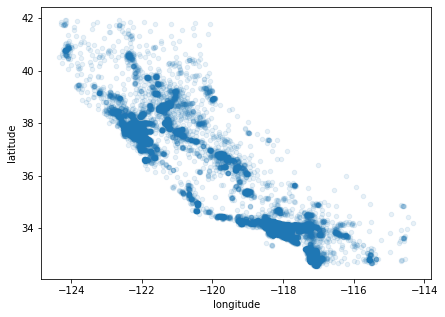

In [11]:
# https://www.jianshu.com/p/f7f00aaa43d4
%matplotlib inline 
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(7, 5))
# alpha代表透明度，点多颜色深，点少颜色浅

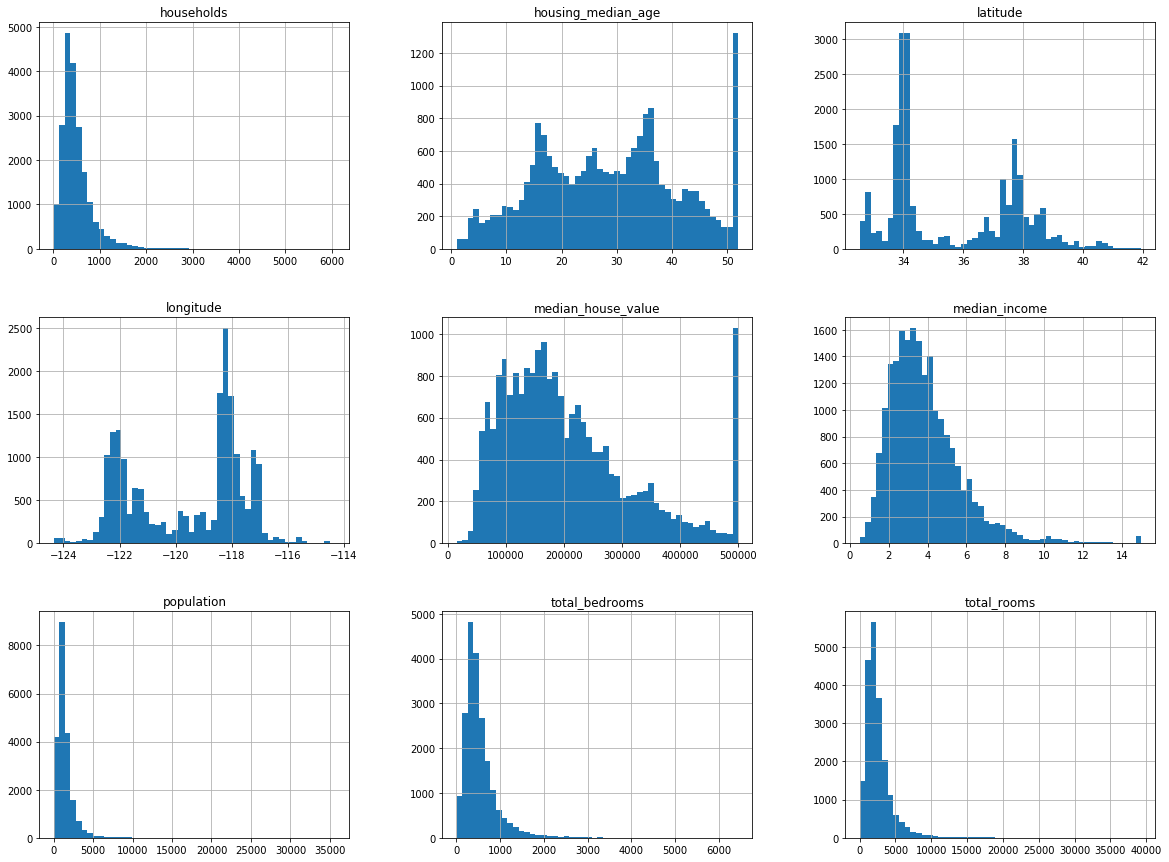

In [12]:
# bins代表条状图的个数  https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### 1.3 评估方法

- 回归问题的典型性能衡量指标是均方根误差(RMSE)，它测量的是预测过程中，预测错误的标准偏差。

## 1.4 创建测试集

- 理论上，创建测试集非常简单:只需要随机选择一些实例，通常是数据集的20%。

In [13]:
import numpy as np

def split_train_test(data, test_ratio):
    
    # 生成随机数列
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

- 是的，这确实能行，但这并不完美:如果你再运行一遍，它又会产生一个不同的数据集!这样下去，<font color="#dd00dd">你(或者是你的机器学习算法) 将会看到整个完整的数据集，而这正是创建测试集时需要避免的。 </font><br /> 

In [14]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")
# <font color="#dd00dd"> </font><br /> 

16512 train + 4128 test


In [15]:
test_random = pd.DataFrame(list(range(10)))
test_random

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [16]:
shuffled_indices = np.random.permutation(len(test_random))
shuffled_indices

array([7, 4, 6, 0, 2, 1, 5, 3, 8, 9])

In [17]:
test_ratio = 0.2
test_set_size = int(len(test_random) * test_ratio)
test_set_size

2

In [18]:
test_indices = shuffled_indices[:test_set_size]
test_indices

array([7, 4])

In [19]:
train_indices = shuffled_indices[test_set_size:]
train_indices

array([6, 0, 2, 1, 5, 3, 8, 9])

In [20]:
test_random.iloc[train_indices]

,0
6,6
0,0
2,2
1,1
5,5
3,3
8,8
9,9


In [21]:
test_random.iloc[test_indices]

,0
7,7
4,4


- 解决方案之一是在第一次运行程序后即保存测试集，随后的运行只是加载它而已。另一种方法是在调用np.random.permutation()之 前设置一个随机数生成器的种子(例如，np.random.seed(42))， 从而让它始终生成相同的随机索引。<font color="#dd00dd"> 但是，这两种解决方案在下一次获取更新的数据时都会中断。</font><br/> 常见的解决办法是每个实例都使用一个标识符(identifier)来决定是否进入测试集(假定每个实例都有一个唯一且不变的标识符)。举例来说，你可以计算每个实例标识符的hash值，只取hash的最后一个字节，如果该值小于等于51(约256的20%)，则将该实例放入测试集。这样可以确保测试集在多个运行里都是一致的，即便更新数据集也仍然一致。新实例的20%将被放入新的测试集，而之前训练集中的 实例也不会被放入新测试集。

#### 实现方法

In [22]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

- 不幸的是，housing数据集没有标识符列。最简单的解决方法是使用行索引作为ID:

In [23]:
housing_with_id = housing.reset_index() # 添加一列指标(index)
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [24]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [25]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- 如果使用行索引作为唯一标识符，你需要确保在数据集的末尾添 加新数据，并且不会删除任何行。如果不能保证这点，那么你可以尝 试使用某个最稳定的特征来创建唯一标识符。例如，一个地区的经纬 度肯定几百万年都不会变，所以你可以将它们组合成如下的ID:

In [26]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [27]:
housing_with_id["id"][20484]

-118685.72

In [28]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


- sklearn中的随机抽样
    - 如果你的数 据集足够庞大(特别是相较于属性的数量而言)，这种方式通常不错;如果不是，则有可能会导致明显的抽样偏差。

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [30]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


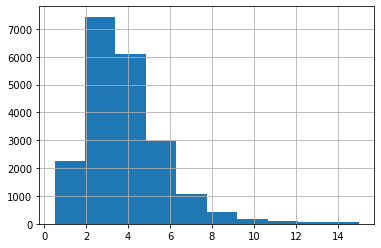

In [31]:
housing["median_income"].hist()

- sklearn中的分层抽样

The following code uses the pd.cut() function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to
3, and so on:

1. 分层

In [32]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# bins指定区间（0，1.5]标记为1

In [33]:
housing["income_cat"].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

2. 分层后数据统计

In [34]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

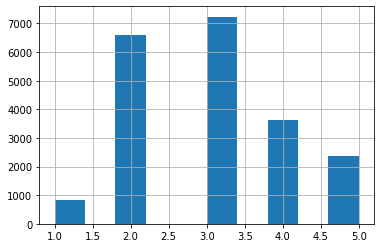

In [35]:
housing["income_cat"].hist()

3. 对分好层的数据进行抽样

[StratifiedShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

### Example

In [36]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
print(rs)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)


- 测试集比例或样本数量，该值为[0.0, 1.0]内的浮点数时，表示测试集占总样本的比例；该值为整型值时，表示具体的测试集样本数量；train_size不设定具体数值时，该值取默认值0.1，train_size设定具体数值时，test_size取剩余部分

In [37]:
# get_n_splits(self[, X, y, groups])Returns the number of splitting iterations in the cross-validator k折
rs.get_n_splits(X, y)

5

In [38]:
# split(self, X[, y, groups]) Generate indices to split data into training and test set.
for train_index, test_index in rs.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]


In [39]:
X_train, y_train

(array([[7, 8],
        [5, 6],
        [3, 4],
        [1, 2]]), array([2, 2, 2, 1]))

In [40]:
X_test, y_test

(array([[5, 6],
        [3, 4]]), array([1, 1]))

In [41]:
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=0.25, random_state=0)
for train_index, test_index in rs.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3 0] TEST: [5 2]
TRAIN: [4 0 2] TEST: [1 3]
TRAIN: [1 2 4] TEST: [3 5]
TRAIN: [3 4 1] TEST: [5 2]
TRAIN: [3 5 1] TEST: [2 4]


### 回到正题

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

- 查看各类数据在测试集的占比

In [43]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [44]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

- 查看原始数据中各类数据的占比

In [45]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

分层抽样中数据占比几乎一样

### 随机抽样与分层抽样

In [46]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [47]:
# 之前housing数据多了一列，此处重新生成一下，并设定随机种子42
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

# 相对于整体的抽样误差率
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [48]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


- 删除income_cat属性，将数据恢复原样

In [49]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [50]:
# 保存数据集
strat_train_set.to_csv('strat_train_set.csv')
strat_test_set.to_csv('strat_test_set.csv')

In [51]:
housing1 = pd.read_csv('./strat_train_set.csv')
housing1.head()  

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
1,18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
2,14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3,3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
4,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
